   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Shape: (200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000            

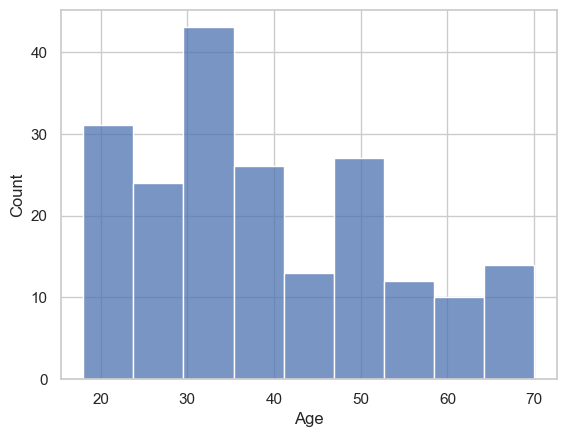

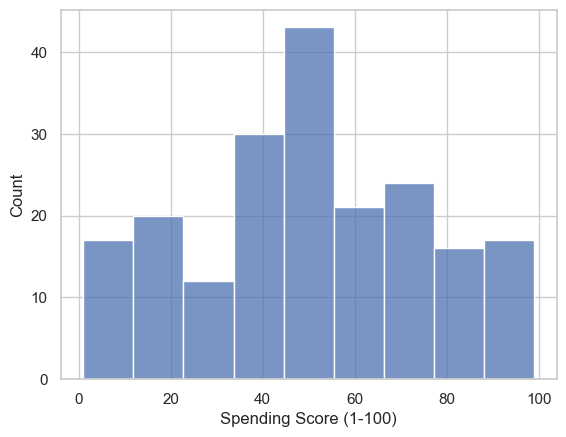

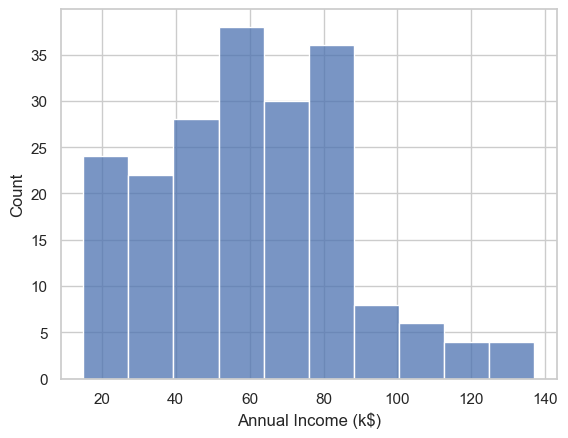

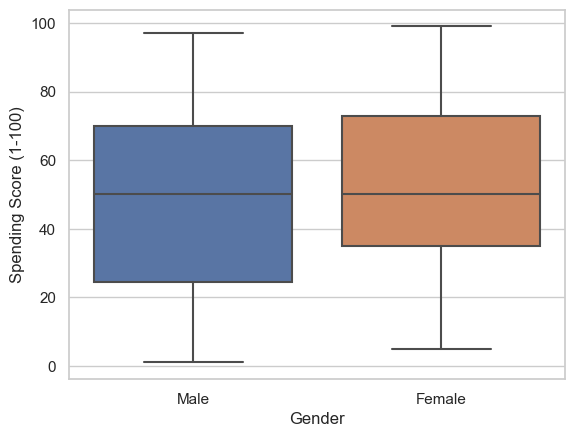

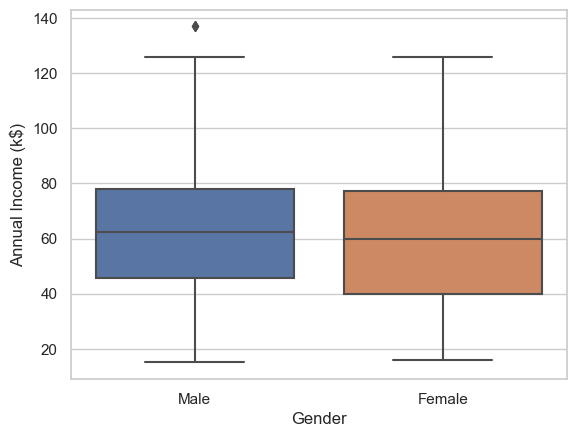

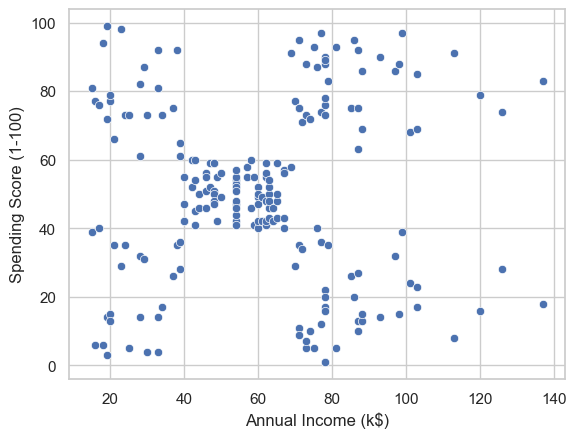

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv("Mall_Customers.csv")

# İlk 5 satırı görüntüle
print(df.head())

# Veri setinin şekli (satır ve sütun sayısı)
print("Shape:", df.shape)

# Veri setindeki sütunların veri tiplerini kontrol et
print(df.dtypes)

# Eksik değerleri kontrol et
print("Missing values:\n", df.isna().sum())

# Temel istatistiksel özetleri görüntüle
print(df.describe())

# Cinsiyet sütununda kaç farklı değer var
print(df['Gender'].value_counts())

# Yaş, harcama puanı ve gelir dağılımını görselleştir
sns.set(style="whitegrid")
sns.histplot(data=df, x="Age")
plt.show()

sns.histplot(data=df, x="Spending Score (1-100)")
plt.show()

sns.histplot(data=df, x="Annual Income (k$)")
plt.show()

# Cinsiyete göre harcama puanı ve gelir dağılımını görselleştir
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.show()

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df)
plt.show()

# Harcama puanı ve gelir arasındaki ilişkiyi görselleştir
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.show()


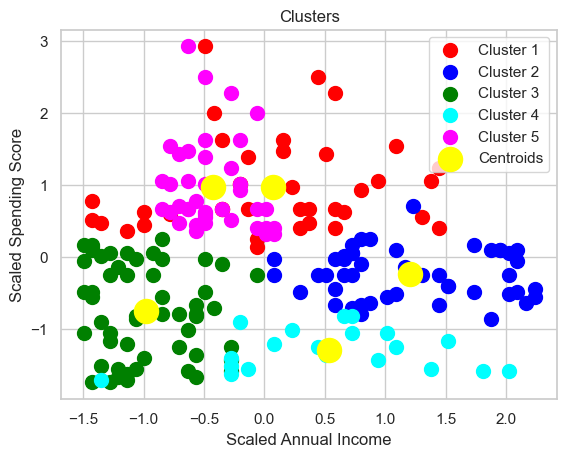

         Spending Score (1-100)  Annual Income (k$)
Cluster                                            
0                     19.358974           86.102564
1                     48.851064           54.382979
2                     62.240741           41.092593
3                     18.350000           26.750000
4                     81.525000           86.100000


In [2]:


# Veri setindeki sayısal sütunları al ve ölçeklendir
X = df.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Küme sayısını belirle
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Kümeleme modelini veriye uygula
y_kmeans = kmeans.fit_predict(X_scaled)

# Küme merkezlerini görselleştir
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

# Kümeleme sonuçlarını veri setine ekle
df['Cluster'] = y_kmeans

# Her kümenin ortalama harcama puanı ve gelirini hesapla
cluster_means = df.groupby('Cluster').mean()[['Spending Score (1-100)', 'Annual Income (k$)']]
print(cluster_means)


In [3]:


# Veri setindeki sayısal sütunları al ve ölçeklendir
X = df.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hopkins istatistiğini hesapla
def hopkins(X):
    d = X.shape[1]
    n = X.shape[0]
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

print(hopkins(X_scaled))


0.761529633934088


In [5]:



# Veri setindeki sayısal sütunları al ve ölçeklendir
X = df.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inertia değerini hesapla
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# Distortion değerini hesapla
distortion = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    distortion.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    
# Sonuçları göster
print("Inertia değerleri:", inertia)
print("Distortion değerleri:", distortion)


C:\Users\insan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\insan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Inertia değerleri: [599.9999999999999, 389.3861889564372, 295.2122461555488, 205.22514747675913, 168.24758017556834, 133.86842085478855, 120.43283250037277, 103.81525583671636, 92.34945767113051, 82.88526644450904]
Distortion değerleri: [1.620358556077695, 1.295873549009658, 1.0962300751151508, 0.9284580379679376, 0.8422948828368898, 0.7417107218899496, 0.7127587283750855, 0.6465059741297228, 0.61591027250944, 0.5906687198864639]


C:\Users\insan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\insan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


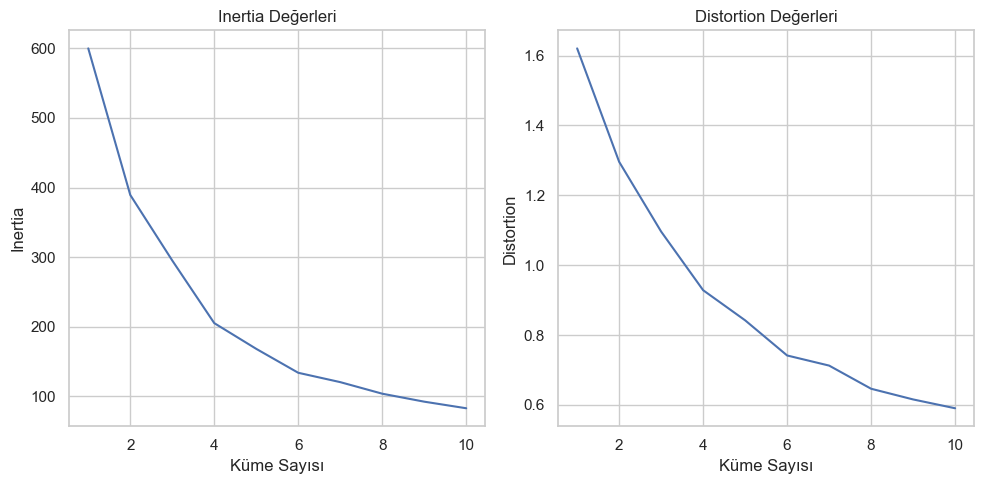

In [6]:


# Veri setindeki sayısal sütunları al ve ölçeklendir
X = df.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inertia değerini hesapla
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# Distortion değerini hesapla
distortion = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    distortion.append(sum(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    
# Inertia ve distortion grafiklerini çizdir
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(range(1, 11), inertia)
ax[0].set_xlabel('Küme Sayısı')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Inertia Değerleri')

ax[1].plot(range(1, 11), distortion)
ax[1].set_xlabel('Küme Sayısı')
ax[1].set_ylabel('Distortion')
ax[1].set_title('Distortion Değerleri')

plt.tight_layout()
plt.show()


In [7]:


# Silhouette score değerini hesapla
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))
    
# Sonuçları ekrana yazdır
for n_clusters, score in zip(range(2, 11), silhouette_scores):
    print("Küme sayısı = {}, Silhouette score = {:.2f}".format(n_clusters, score))


Küme sayısı = 2, Silhouette score = 0.34
Küme sayısı = 3, Silhouette score = 0.36
Küme sayısı = 4, Silhouette score = 0.40
Küme sayısı = 5, Silhouette score = 0.42
Küme sayısı = 6, Silhouette score = 0.43
Küme sayısı = 7, Silhouette score = 0.41
Küme sayısı = 8, Silhouette score = 0.41
Küme sayısı = 9, Silhouette score = 0.42
Küme sayısı = 10, Silhouette score = 0.42


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

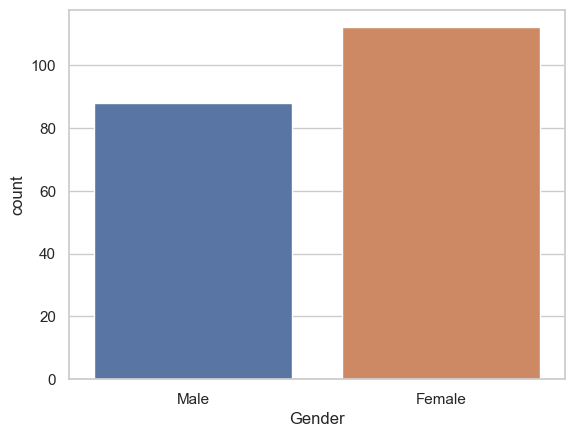

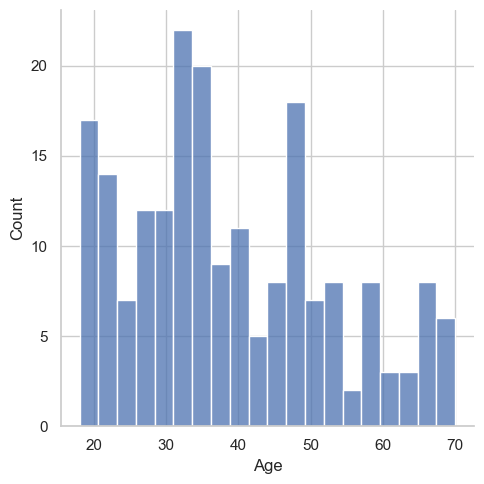

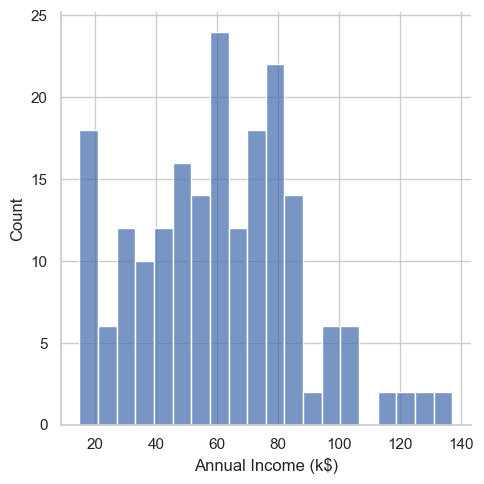

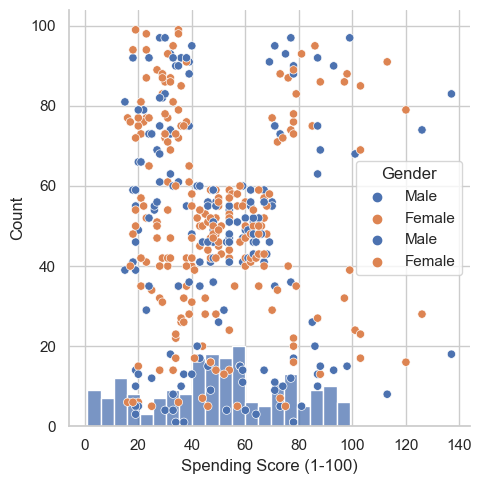

In [8]:
# Cinsiyete göre müşteri sayısı
sns.countplot(x="Gender", data=df)

# Yaşa göre müşterilerin dağılımı
sns.displot(data=df, x="Age", bins=20)

# Gelire göre müşterilerin dağılımı
sns.displot(data=df, x="Annual Income (k$)", bins=20)

# Harcama puanına göre müşterilerin dağılımı
sns.displot(data=df, x="Spending Score (1-100)", bins=20)

# Yaşa ve Harcama puanına göre müşterilerin dağılımı
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")

# Gelir ve Harcama puanına göre müşterilerin dağılımı
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")


In [9]:
new_df = df[["Age", "Spending Score (1-100)"]]


C:\Users\insan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


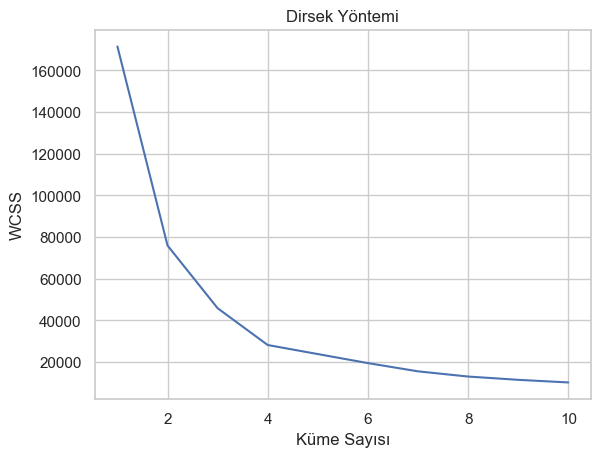

In [11]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("Dirsek Yöntemi")
plt.xlabel("Küme Sayısı")
plt.ylabel("WCSS")
plt.show()




In [12]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(new_df)

y_kmeans = kmeans.predict(new_df)

new_df["cluster"] = y_kmeans


C:\Users\insan\AppData\Local\Temp\ipykernel_8516\3446223607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["cluster"] = y_kmeans


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

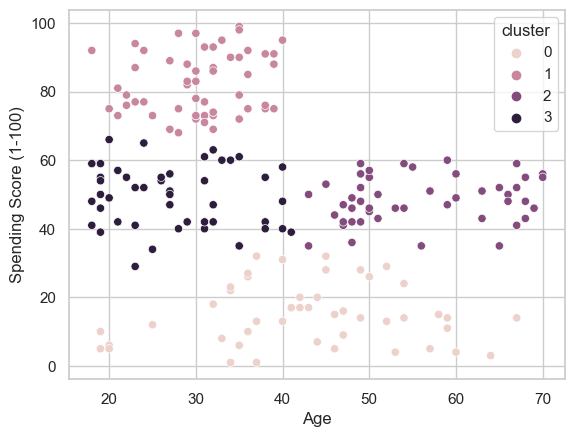

In [13]:
sns.scatterplot(data=new_df, x="Age", y="Spending Score (1-100)", hue="cluster")


In [14]:
#stream kodlar
import streamlit as st
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Exploratory Data Analysis (EDA)
st.subheader("Exploratory Data Analysis")
st.write("Top 5 rows of the dataset:")
st.write(df.head())

st.write("Dataset shape:")
st.write(df.shape)

st.write("Descriptive statistics of the dataset:")
st.write(df.describe())

# Clustering based on Age and Spending Score
st.subheader("Clustering based on Age and Spending Score")

# Create a new dataset with two variables of your choice
X1 = df[['Age', 'Spending Score (1-100)']].values

# Determine optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X1)
    distortions.append(kmeans.inertia_)
    
st.write("Elbow plot:")
fig, ax = plt.subplots()
ax.plot(range(1, 11), distortions)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Distortion')
st.pyplot(fig)

# Apply K Means
n_clusters = st.slider("Select number of clusters:", 2, 10, 3, 1)
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X1)

# Visualizing and Labeling All the Clusters
st.write(f"{n_clusters} Clusters")
fig, ax = plt.subplots()
sns.scatterplot(x=X1[y_kmeans == 0, 0], y=X1[y_kmeans == 0, 1], label='Cluster 1')
sns.scatterplot(x=X1[y_kmeans == 1, 0], y=X1[y_kmeans == 1, 1], label='Cluster 2')
if n_clusters > 2:
    sns.scatterplot(x=X1[y_kmeans == 2, 0], y=X1[y_kmeans == 2, 1], label='Cluster 3')
if n_clusters > 3:
    sns.scatterplot(x=X1[y_kmeans == 3, 0], y=X1[y_kmeans == 3, 1], label='Cluster 4')
if n_clusters > 4:
    sns.scatterplot(x=X1[y_kmeans == 4, 0], y=X1[y_kmeans == 4, 1], label='Cluster 5')
if n_clusters > 5:
    sns.scatterplot(x=X1[y_kmeans == 5, 0], y=X1[y_kmeans == 5, 1], label='Cluster 6')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
st.pyplot(fig)

# Clustering based on Annual Income and Spending Score
st.subheader("Clustering based on Annual Income and Spending Score")

# Create a new dataset with two variables of your choice
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Determine optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k


SyntaxError: EOL while scanning string literal (2077385670.py, line 73)